In [1]:
from pomegranate import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
import itertools

import warnings
warnings.filterwarnings('ignore')

## Сэмплирование 

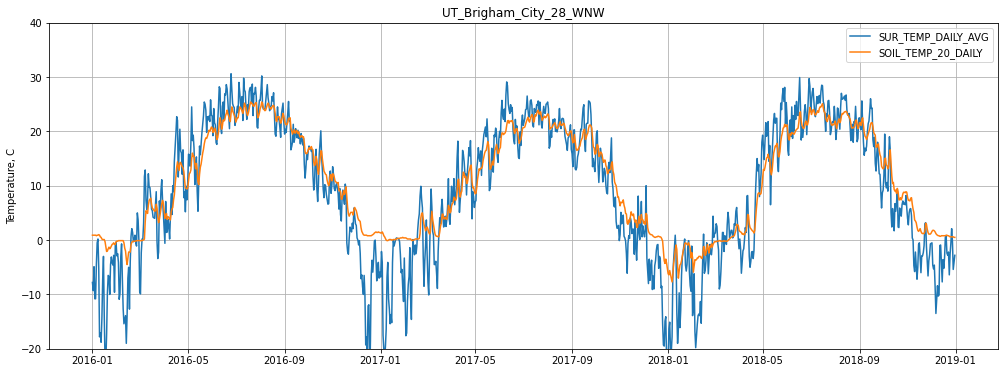

In [28]:
filtered_df=df[(df['LST_DATE'] < '2019-01-01')]
plt.rcParams['figure.figsize'] = [17, 6]
fig, ax = plt.subplots()
ax.plot(filtered_df['LST_DATE'], filtered_df['SUR_TEMP_DAILY_AVG'], label='SUR_TEMP_DAILY_AVG')
ax.plot(filtered_df['LST_DATE'], filtered_df['SOIL_TEMP_20_DAILY'], label='SOIL_TEMP_20_DAILY')
ax.set(ylabel='Temperature, C',title='UT_Brigham_City_28_WNW')
plt.ylim((-20,40))
plt.legend()
plt.grid()
plt.show()

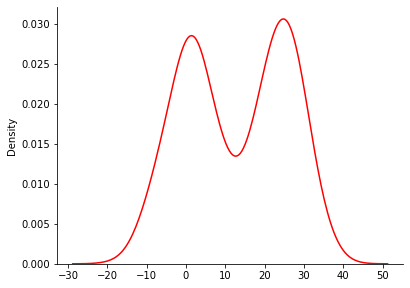

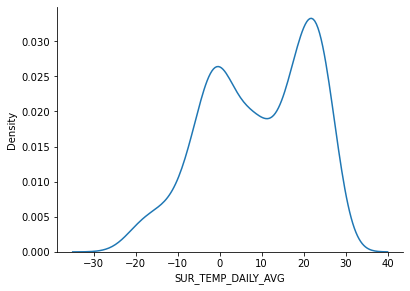

In [42]:
mu1, sigma1 = 1.018, 6.14
LST1 = np.random.normal(mu1, sigma1, 365)

mu2, sigma2 = 24.63, 5.43
LST2 = np.random.normal(mu2, sigma2, 365)

all_dist=np.concatenate([LST1, LST2])


g=sns.displot(all_dist, kind="kde", label='kde', color='red')
g.fig.set_size_inches(7,4)
g=sns.displot(filtered_df['SUR_TEMP_DAILY_AVG'], kind="kde", label='kde')
g.fig.set_size_inches(7,4)


(-10.0, 30.0)

<Figure size 720x432 with 0 Axes>

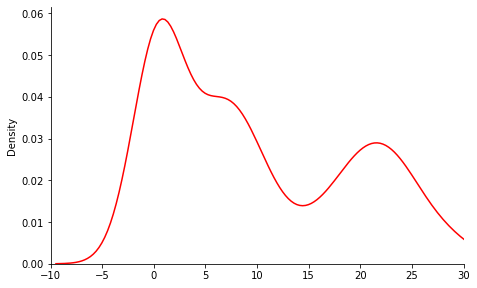

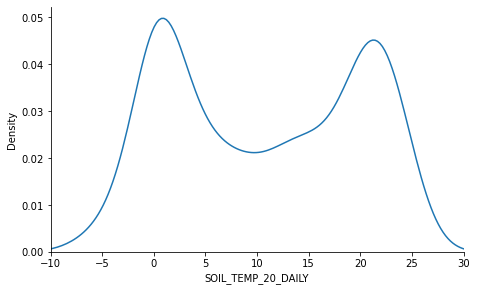

In [47]:
mu1, sigma1 = 21.44, 4.158
LST1 = np.random.normal(mu1, sigma1, 365)

mu2, sigma2 = 7.348, 2.569
LST2 = np.random.normal(mu2, sigma2, 365)

mu3, sigma3 = 0.361, 0.923
LST3 = np.random.normal(mu3, sigma3, 365)

all_dist=np.concatenate([LST1, LST2, LST3])

plt.clf()
g=sns.displot(all_dist, kind="kde", label='kde', color='red')
g.fig.set_size_inches(7,4)
plt.xlim(-10, 30)
g=sns.displot(filtered_df['SOIL_TEMP_20_DAILY'], kind="kde", label='kde')
g.fig.set_size_inches(7,4)
plt.xlim(-10, 30)

In [2]:
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
monty = ConditionalProbabilityTable(
        [['A', 'A', 'A', 0.0],
         ['A', 'A', 'B', 0.5],
         ['A', 'A', 'C', 0.5],
         ['A', 'B', 'A', 0.0],
         ['A', 'B', 'B', 0.0],
         ['A', 'B', 'C', 1.0],
         ['A', 'C', 'A', 0.0],
         ['A', 'C', 'B', 1.0],
         ['A', 'C', 'C', 0.0],
         ['B', 'A', 'A', 0.0],
         ['B', 'A', 'B', 0.0],
         ['B', 'A', 'C', 1.0],
         ['B', 'B', 'A', 0.5],
         ['B', 'B', 'B', 0.0],
         ['B', 'B', 'C', 0.5],
         ['B', 'C', 'A', 1.0],
         ['B', 'C', 'B', 0.0],
         ['B', 'C', 'C', 0.0],
         ['C', 'A', 'A', 0.0],
         ['C', 'A', 'B', 1.0],
         ['C', 'A', 'C', 0.0],
         ['C', 'B', 'A', 1.0],
         ['C', 'B', 'B', 0.0],
         ['C', 'B', 'C', 0.0],
         ['C', 'C', 'A', 0.5],
         ['C', 'C', 'B', 0.5],
         ['C', 'C', 'C', 0.0]], [guest, prize])

s1 = Node(guest, name="guest")
s2 = Node(prize, name="prize")
s3 = Node(monty, name="monty")

model = BayesianNetwork("Monty Hall Problem")
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.bake()

In [3]:
print(model.probability([['A', 'A', 'A'],
                             ['A', 'A', 'B'],
                             ['C', 'C', 'B']]))

[0.         0.05555556 0.05555556]


In [6]:
print(np.array(model.predict([['A', 'B', None],
                         ['A', 'C', None],
                         ['C', 'B', None]])))

[['A' 'B' 'C']
 ['A' 'C' 'B']
 ['C' 'B' 'A']]


In [2]:
test_file='C:/Users/Julia/Documents/ITMO/Statistical_data_analysis/Full_project/no_gaps_data/WI_Necedah_5_WNW.txt'
df=pd.read_csv(test_file, sep=',')
df['LST_DATE'] = pd.to_datetime(df['LST_DATE'], format='%Y-%m-%d')
df_2020=df[df['LST_DATE'].dt.year==2020]
df_2019=df[df['LST_DATE'].dt.year==2019]
df_2018=df[df['LST_DATE'].dt.year==2018]
df_2017=df[df['LST_DATE'].dt.year==2017]
df_2016=df[df['LST_DATE'].dt.year==2016]

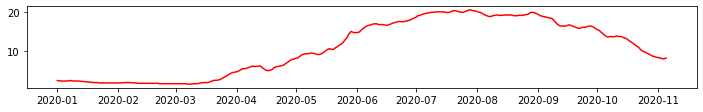

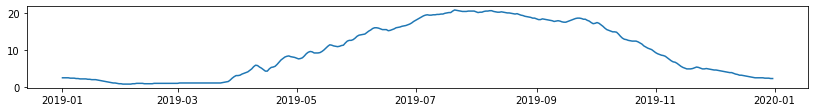

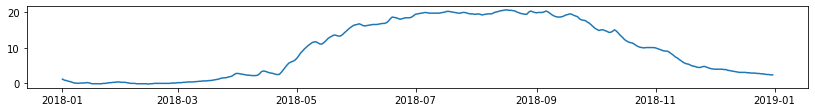

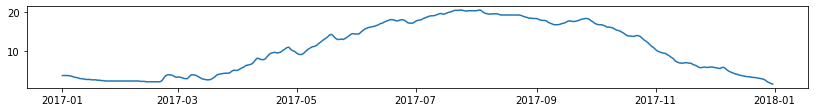

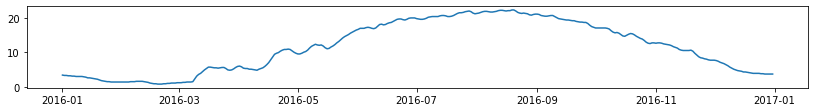

In [3]:
plt.rcParams['figure.figsize'] = [12, 1.5]
plt.plot(df_2020['LST_DATE'], df_2020['SOIL_TEMP_100_DAILY'], c='r')
plt.show()
plt.rcParams['figure.figsize'] = [14, 1.5]
plt.plot(df_2019['LST_DATE'], df_2019['SOIL_TEMP_100_DAILY'])
plt.show()
plt.plot(df_2018['LST_DATE'], df_2018['SOIL_TEMP_100_DAILY'])
plt.show()
plt.plot(df_2017['LST_DATE'], df_2017['SOIL_TEMP_100_DAILY'])
plt.show()
plt.plot(df_2016['LST_DATE'], df_2016['SOIL_TEMP_100_DAILY'])
plt.show()

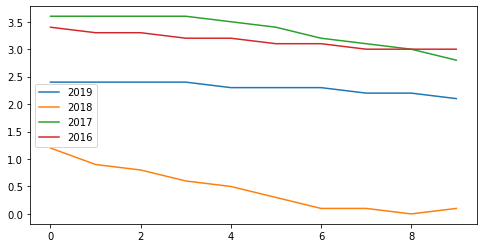

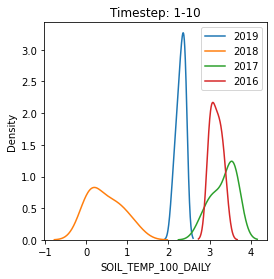

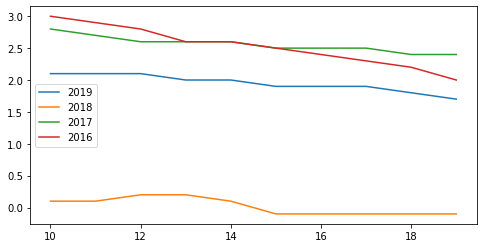

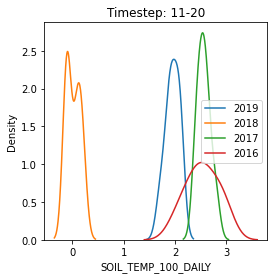

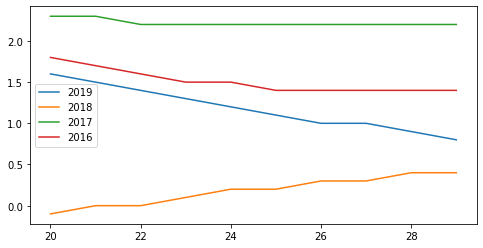

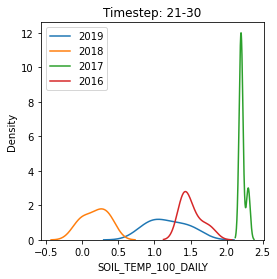

In [12]:
w_size=10
start_day=0
w_number=3
dataset=[]
names=[]

dist_dict={}
intervals_dict=[]

for i in range (start_day, start_day+w_number*w_size, w_size):    
    
    dataset.append([df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].min(), df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].max(),df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()])
    names.append(['2020,'+str(i+1)+'-'+str(i+w_size)])
    dist_dict['2020,'+str(i+1)+'-'+str(i+w_size)]=df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy()
    intervals_dict.append({'name': '2020,'+str(i+1)+'-'+str(i+w_size),
                           'start': i,
                           'end': i+w_size,
                           'values': df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy(),
                           'min':df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].min(),
                           'max':df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].max(),
                           'std':df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].std(),
                           'mean':df_2020['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()
                          })
    ################    
    dataset.append([df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].min(), df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].max(), df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()])
    names.append(['2019,'+str(i+1)+'-'+str(i+w_size)])
    dist_dict['2019,'+str(i+1)+'-'+str(i+w_size)]=df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy()
    intervals_dict.append({'name': '2019,'+str(i+1)+'-'+str(i+w_size),
                           'start': i,
                           'end': i+w_size,
                           'values': df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy(),
                           'min':df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].min(),
                           'max':df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].max(),
                           'std':df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].std(),
                           'mean':df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()
                          })
    ################
    dataset.append([df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].min(), df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].max(), df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()])
    names.append(['2018,'+str(i+1)+'-'+str(i+w_size)])
    dist_dict['2018,'+str(i+1)+'-'+str(i+w_size)]=df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy()
    intervals_dict.append({'name': '2018,'+str(i+1)+'-'+str(i+w_size),
                           'start': i,
                           'end': i+w_size,
                           'values': df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy(),
                           'min':df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].min(),
                           'max':df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].max(),
                           'std':df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].std(),
                           'mean':df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()
                          })
    ################
    dataset.append([df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].min(), df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].max(), df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()])
    names.append(['2017,'+str(i+1)+'-'+str(i+w_size)])
    dist_dict['2017,'+str(i+1)+'-'+str(i+w_size)]=df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy()
    intervals_dict.append({'name': '2017,'+str(i+1)+'-'+str(i+w_size),
                           'start': i,
                           'end': i+w_size,
                           'values': df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy(),
                           'min':df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].min(),
                           'max':df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].max(),
                           'std':df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].std(),
                           'mean':df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()
                          })
    ################
    dataset.append([df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].min(), df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].max(), df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()])
    names.append(['2016,'+str(i+1)+'-'+str(i+w_size)])
    dist_dict['2016,'+str(i+1)+'-'+str(i+w_size)]=df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy()
    intervals_dict.append({'name': '2016,'+str(i+1)+'-'+str(i+w_size),
                           'start': i,
                           'end': i+w_size,
                           'values': df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].to_numpy(),
                           'min':df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].min(),
                           'max':df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].max(),
                           'std':df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].std(),
                           'mean':df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size].mean()
                          })
    
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.plot(np.arange(i, i+w_size), df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size], label='2019')
    plt.plot(np.arange(i, i+w_size), df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size], label='2018')
    plt.plot(np.arange(i, i+w_size), df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size], label='2017')
    plt.plot(np.arange(i, i+w_size), df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size], label='2016')
    plt.legend()
    plt.show()
    
    plt.rcParams['figure.figsize'] = [4, 4]
    sns.distplot(df_2019['SOIL_TEMP_100_DAILY'][i:i+w_size], hist=False, label='2019')
    sns.distplot(df_2018['SOIL_TEMP_100_DAILY'][i:i+w_size], hist=False, label='2018')
    sns.distplot(df_2017['SOIL_TEMP_100_DAILY'][i:i+w_size], hist=False, label='2017')
    sns.distplot(df_2016['SOIL_TEMP_100_DAILY'][i:i+w_size], hist=False, label='2016')
    plt.title('Timestep: %s'%str(i+1)+'-'+str(i+w_size))
    plt.legend()
    plt.show()


In [13]:
dataset=np.array(dataset)
names=np.array(names)
#print(np.concatenate((names, dataset), axis=1))
#print(intervals_dict)

In [14]:
class_number=3
classes_dict={}
gmm = mixture.GaussianMixture(n_components=class_number, ).fit(dataset)
labels = gmm.predict(dataset)

lines=np.concatenate((names, labels.reshape(labels.shape[0], 1)), axis=1)
for i in range (len(lines)):
    intervals_dict[i]['class']=lines[i][1]
    classes_dict[lines[i][0]]=lines[i][1]
#print(classes_dict)
#print(intervals_dict)

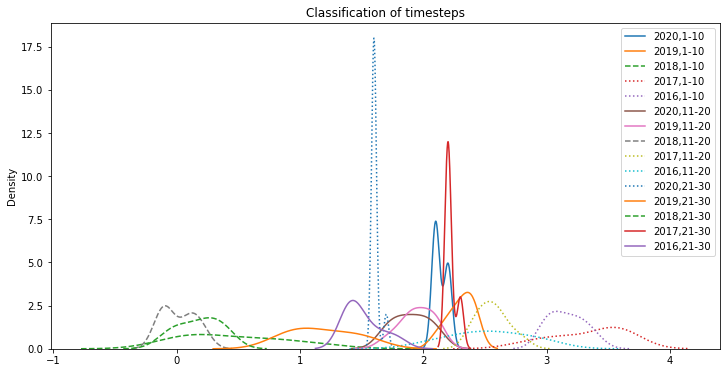

In [15]:
linestyle=None
plt.rcParams['figure.figsize'] = [12, 6]
for key in dist_dict.keys():
    if classes_dict[key]=='0':
        linestyle='dotted'
    if classes_dict[key]=='1':
        linestyle='dashed'
    if classes_dict[key]=='2':
        linestyle='solid'
    if classes_dict[key]=='3':
        linestyle='dashdot'
    sns.distplot(dist_dict[key], hist=False, label=key, kde_kws={'linestyle':linestyle})
plt.legend()
plt.title('Classification of timesteps')
plt.show()

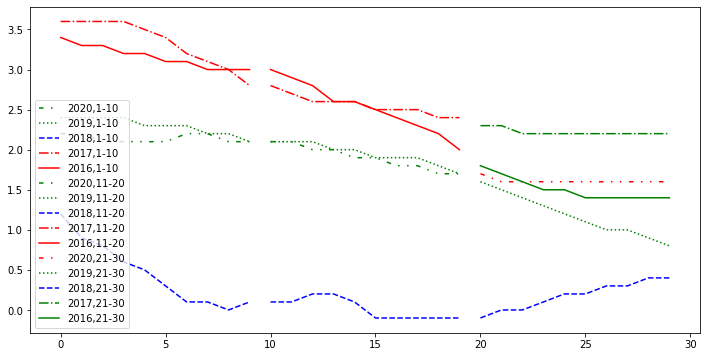

In [16]:
for interval in intervals_dict:
    
    if '2019' in interval['name']:
        linestyle='dotted'
    if '2018' in interval['name']:
        linestyle='dashed'
    if '2017' in interval['name']:
        linestyle='dashdot'
    if '2016' in interval['name']:
        linestyle='solid'
    if '2020' in interval['name']:
        linestyle=(0, (3, 5, 1, 5, 1, 5))
        
    if interval['class']=='0':
        color='red'
    if interval['class']=='1':
        color='blue'
    if interval['class']=='2':
        color='green'
        
    plt.plot(np.arange(interval['start'], interval['end']), interval['values'], linestyle=linestyle, color=color, 
             label=interval['name'])

plt.legend()
plt.show()

    

In [69]:
c_2019=[]
c_2018=[]
c_2017=[]
c_2016=[]
c_2020=[]
#print(intervals_dict)
for interval in intervals_dict:    
    if '2019' in interval['name']:
        c_2019.append(interval['class'])
    if '2018' in interval['name']:
        c_2018.append(interval['class'])
    if '2017' in interval['name']:
        c_2017.append(interval['class'])
    if '2016' in interval['name']:
        c_2016.append(interval['class'])
    if '2020' in interval['name']:
        c_2020.append(interval['class'])

c_2019 = list(map(int, c_2019))
c_2018 = list(map(int, c_2018))
c_2017 = list(map(int, c_2017))
c_2016 = list(map(int, c_2016))
print(c_2019)
print(c_2018)
print(c_2017)
print(c_2016)

print('Control 2020')
print(c_2020)

b=[[0, 1, 2], [0, 1, 2]]
pr_tabel=np.array(list(itertools.product(*b)))
print(pr_tabel)

a=[[0, 1, 2], [0, 1, 2], [0, 1, 2]]
pr_tabel=np.array(list(itertools.product(*a)))
print(pr_tabel)

[2, 2, 2]
[1, 1, 1]
[0, 0, 2]
[0, 0, 2]
Control 2020
['2', '2', '0']
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
[[0 0 0]
 [0 0 1]
 [0 0 2]
 [0 1 0]
 [0 1 1]
 [0 1 2]
 [0 2 0]
 [0 2 1]
 [0 2 2]
 [1 0 0]
 [1 0 1]
 [1 0 2]
 [1 1 0]
 [1 1 1]
 [1 1 2]
 [1 2 0]
 [1 2 1]
 [1 2 2]
 [2 0 0]
 [2 0 1]
 [2 0 2]
 [2 1 0]
 [2 1 1]
 [2 1 2]
 [2 2 0]
 [2 2 1]
 [2 2 2]]


In [67]:
first = DiscreteDistribution({'0': 1./3, '1': 1./3, '2': 1./3})
second = ConditionalProbabilityTable(
        [['0', '0', 0.23],
         ['0', '1', 0.0],
         ['0', '2', 0.22],
         ['1', '0', 0.0],
         ['1', '1', 0.22],
         ['1', '2', 0.0],
         ['2', '0', 0.0],
         ['2', '1', 0.0],
         ['2', '2', 0.23]], [first])
third = ConditionalProbabilityTable(
        [['0', '0', '0', 0.0],
         ['0', '0', '1', 0.25],
         ['0', '0', '2', 0.0],
         ['0', '1', '0', 0.0],
         ['0', '1', '1', 0.0],
         ['0', '1', '2', 0.0],
         ['0', '2', '0', 0.0],
         ['0', '2', '1', 0.0],
         ['0', '2', '2', 0.0],
         ['1', '0', '0', 0.0],
         ['1', '0', '1', 0.0],
         ['1', '0', '2', 0.0],
         ['1', '1', '0', 0.0],
         ['1', '1', '1', 0.25],
         ['1', '1', '2', 0.0],
         ['1', '2', '0', 0.0],
         ['1', '2', '1', 0.0],
         ['1', '2', '2', 0.0],
         ['2', '0', '0', 0.5],
         ['2', '0', '1', 0.0],
         ['2', '0', '2', 0.0],
         ['2', '1', '0', 0.0],
         ['2', '1', '1', 0.0],
         ['2', '1', '2', 0.0],
         ['2', '2', '0', 0.0],
         ['2', '2', '1', 0.0],
         ['2', '2', '2', 0.0]], [first, second])

s1 = Node(first, name="first")
s2 = Node(second, name="second")
s3 = Node(third, name="third")

model = BayesianNetwork("Temperature prediction problem")
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s1, s2)
model.add_edge(s2, s3)
model.bake()

In [71]:
print(np.array(model.predict([['2', '2', None]])))
predicted_class=np.array(model.predict([['2', '2', None]]))[0][1]

[['2' '2' '2']]


In [111]:
suitable_distributions=[]
for interval in intervals_dict:
    if interval['class']==predicted_class and '2020' not in interval['name']:
        suitable_distributions.append(interval['values'])
print(np.array(suitable_distributions))

2019,1-10
2019,11-20
2019,21-30
2017,21-30
2016,21-30
[[2.4 2.4 2.4 2.4 2.3 2.3 2.3 2.2 2.2 2.1]
 [2.1 2.1 2.1 2.  2.  1.9 1.9 1.9 1.8 1.7]
 [1.6 1.5 1.4 1.3 1.2 1.1 1.  1.  0.9 0.8]
 [2.3 2.3 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2]
 [1.8 1.7 1.6 1.5 1.5 1.4 1.4 1.4 1.4 1.4]]


In [112]:
new_dest=[]
v_n=len(suitable_distributions[0])
for i in range(v_n):    
    summ=0
    for dist in suitable_distributions:
        summ=summ+dist[i]
    mean=summ/len(suitable_distributions)
    new_dest.append(mean)
print(np.array(new_dest))

[2.04 2.   1.94 1.88 1.84 1.78 1.76 1.74 1.7  1.64]


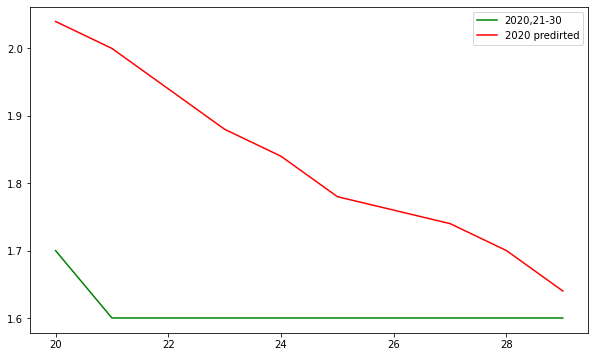

In [106]:

for interval in intervals_dict:
    if '2020' in interval['name'] and interval['start']==20:
        plt.plot(np.arange(interval['start'], interval['end']), interval['values'], color='g', 
                     label=interval['name'])
        plt.plot(np.arange(interval['start'], interval['end']), new_dest, color='r', 
                     label='2020 predirted')
plt.legend()

[2.2 2.2 2.1 2.1 2.1 2.1 2.2 2.2 2.1 2.1]
[2.1 2.1 2.  2.  1.9 1.9 1.8 1.8 1.7 1.7]
[1.7 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6]


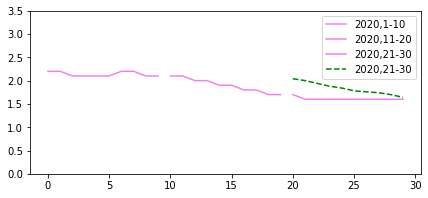

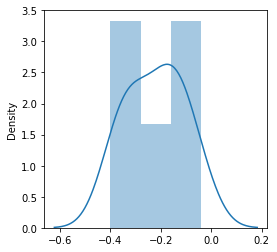

In [120]:
for interval in intervals_dict:
    
    if '2019' in interval['name']:
        linestyle='dotted'
    if '2018' in interval['name']:
        linestyle='dashed'
    if '2017' in interval['name']:
        linestyle='dashdot'
    if '2016' in interval['name']:
        linestyle='solid'
    if '2020' in interval['name']:
        linestyle=(0, (3, 5, 1, 5, 1, 5))
        
    if interval['class']=='0':
        color='red'
    if interval['class']=='1':
        color='blue'
    if interval['class']=='2':
        color='green'
    plt.rcParams['figure.figsize'] = [7, 3]
    if '2020' in interval['name']: 
        print(interval['values'])        
        plt.plot(np.arange(interval['start'], interval['end']), interval['values'], linestyle='solid', color='violet', 
                 label=interval['name'])
    if '2020' in interval['name'] and interval['start']==20:
        test=interval['values']
        plt.plot(np.arange(interval['start'], interval['end']), new_dest, linestyle='dashed', color='green', 
                 label=interval['name'])


plt.legend()
plt.ylim(0, 3.5)
plt.show()

plt.rcParams['figure.figsize'] = [4, 4]
sns.distplot(test-new_dest)
plt.show()